In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import re

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_colwidth', -1)

In [3]:
total_2008=pd.read_csv('new_cleaned/2008_total.csv')
nu_2008=pd.read_csv('new_cleaned/2008_nu.csv')
npnd_2008=pd.read_csv('new_cleaned/2008_npnd.csv')
wpwd_2008=pd.read_csv('new_cleaned/2008_wpwd.csv')

In [4]:
# Pain No Drugs

In [5]:
import glob
filenames = glob.glob("new_cleaned/*.csv")

df_list=[]

for filename in filenames:
    df=pd.read_csv(filename)
    df['filename'] = filename
    df_list.append(df)
    

In [6]:
df=pd.concat(df_list, sort=True, ignore_index=True)

# Extracting the 'Year' from the filename and creating a 'Date_Time' column

In [7]:
df['Year']=df.filename.str.extract(r"/(\d\d\d\d)_")

In [8]:
df['Date_Time']=pd.to_datetime(df.Year, format='%Y')

# Removing the commas from the values

In [9]:
df=df.replace({',': ''}, regex=True)

# Splitting the data to their original categories

In [10]:
df_total=df[df.filename.str.contains('total')]

In [11]:
df_nu=df[df.filename.str.contains('nu')]

In [12]:
df_wpwd=df[df.filename.str.contains('wpwd')]

In [13]:
df_wpnd=df[df.filename.str.contains('wpnd')]

In [14]:
df_npnd=df[df.filename.str.contains('npnd')]

In [15]:
# from functools import partial

df.apply(pd.to_numeric, errors='coerce').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 16 columns):
All_Other_Covered_Species    2318 non-null int64
Cats                         2318 non-null int64
Dogs                         2318 non-null int64
Guinea_Pigs                  2318 non-null int64
Hamsters                     2318 non-null int64
Marine_Mammals               780 non-null float64
Nonhuman_Primates            2318 non-null int64
Other_Farm_Animals           2318 non-null int64
Pig                          2318 non-null int64
Rabbits                      2318 non-null int64
Sheep                        2318 non-null int64
State                        52 non-null float64
Total                        2266 non-null float64
filename                     0 non-null float64
Year                         2318 non-null int64
Date_Time                    2318 non-null int64
dtypes: float64(4), int64(12)
memory usage: 289.8 KB


In [23]:
df_total['Total']=df_total.Total.astype(float)

/Users/viceproduction/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


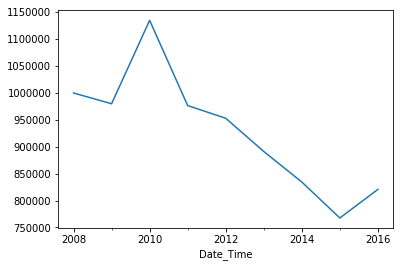

In [24]:
df_total.groupby('Date_Time').Total.sum().plot()